# Sales Analysis

In [ ]:
# Importing necessary libraries

import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# Merging multiple CSV files into a single CSV file

stock_files=sorted(glob('Sales_Data/Sales_*.csv'))
df=pd.concat((pd.read_csv(file).assign(filename=file) for file in stock_files), ignore_index=True) 


In [5]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,filename
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_Data\Sales_April_2019.csv
1,NaN,NaN,NaN,NaN,NaN,NaN,Sales_Data\Sales_April_2019.csv
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_Data\Sales_April_2019.csv
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_Data\Sales_April_2019.csv
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_Data\Sales_April_2019.csv
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Sales_Data\Sales_April_2019.csv
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",Sales_Data\Sales_April_2019.csv
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",Sales_Data\Sales_April_2019.csv
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",Sales_Data\Sales_April_2019.csv
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",Sales_Data\Sales_April_2019.csv


# Data Pre-Processing

In [6]:
# Checking the NaN values in the dataframe

nan_df=df[df.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,filename
1,NaN,NaN,NaN,NaN,NaN,NaN,Sales_Data\Sales_April_2019.csv
356,NaN,NaN,NaN,NaN,NaN,NaN,Sales_Data\Sales_April_2019.csv
735,NaN,NaN,NaN,NaN,NaN,NaN,Sales_Data\Sales_April_2019.csv
1433,NaN,NaN,NaN,NaN,NaN,NaN,Sales_Data\Sales_April_2019.csv
1553,NaN,NaN,NaN,NaN,NaN,NaN,Sales_Data\Sales_April_2019.csv


In [7]:
# Dropping the NaN values

df=df.dropna(how='any')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,filename
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_Data\Sales_April_2019.csv
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_Data\Sales_April_2019.csv
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_Data\Sales_April_2019.csv
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_Data\Sales_April_2019.csv
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Sales_Data\Sales_April_2019.csv


In [8]:
# Getting rid of the text in order date column

df=df[df['Order Date'].str[0:2]!='Or']


In [9]:
# Augmenting the data with additional columns

df['Month']=df['Order Date'].str[0:2]
df['Month']=df['Month'].astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,filename,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_Data\Sales_April_2019.csv,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_Data\Sales_April_2019.csv,4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_Data\Sales_April_2019.csv,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_Data\Sales_April_2019.csv,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Sales_Data\Sales_April_2019.csv,4


In [10]:
# Converting the columns to its correct type

df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'])# make int
df['Price Each']=pd.to_numeric(df['Price Each'])#make float

#  Exploration Data Analysis

# Q1. What is the best month for sales? How much was the money earned for that particular month?

In [ ]:
df['Sales']=df['Quantity Ordered']* df['Price Each']
df.head()

In [12]:
results=df.groupby('Month').sum()#Q1. December was the best month for sales.

In [13]:
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


In [14]:
#Adding the city column to the dataframe

def get_city(address):
    return address.split(",")[1].strip(" ")
df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,filename,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_Data\Sales_April_2019.csv,4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_Data\Sales_April_2019.csv,4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_Data\Sales_April_2019.csv,4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_Data\Sales_April_2019.csv,4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Sales_Data\Sales_April_2019.csv,4,11.99,Los Angeles


# Data Visualization

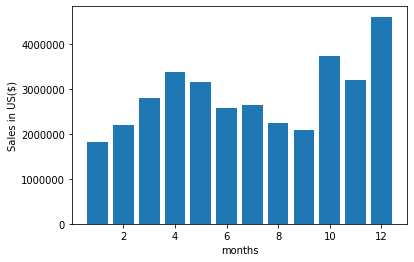

In [15]:
#plotting months vs sales

months=range(1,13)
plt.bar(months, results['Sales'])
plt.xlabel('months')
plt.ylabel('Sales in US($)')
plt.show()

# Q2. Which city sold the highest number of products?

In [16]:
results=df.groupby('City').sum()#Q1. December was the best month for sales.

In [17]:
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta,16602,2.779908e+06,104794,2.795499e+06
Austin,11153,1.809874e+06,69829,1.819582e+06
Boston,22528,3.637410e+06,141112,3.661642e+06
Dallas,16730,2.752628e+06,104620,2.767975e+06
Los Angeles,33289,5.421435e+06,208325,5.452571e+06
New York City,27932,4.635371e+06,175741,4.664317e+06
Portland,14053,2.307747e+06,87765,2.320491e+06
San Francisco,50239,8.211462e+06,315520,8.262204e+06
Seattle,16553,2.733296e+06,104941,2.747755e+06


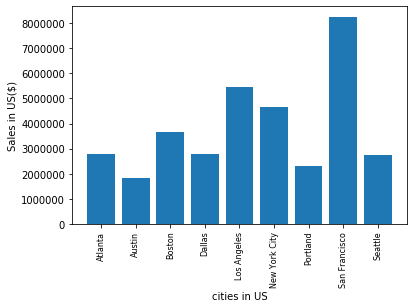

In [18]:
#plotting city vs sales

cities=[city for city, df1 in df.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel('cities in US')
plt.ylabel('Sales in US($)')
plt.show()

# Q3. What time should we display advertisements to maximize likelihood of customer's buying product?

In [20]:
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute
df['Count'] = 1
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,filename,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_Data\Sales_April_2019.csv,4,23.90,Dallas,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_Data\Sales_April_2019.csv,4,99.99,Boston,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_Data\Sales_April_2019.csv,4,600.00,Los Angeles,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_Data\Sales_April_2019.csv,4,11.99,Los Angeles,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Sales_Data\Sales_April_2019.csv,4,11.99,Los Angeles,9,27,1


#  Data Visualization

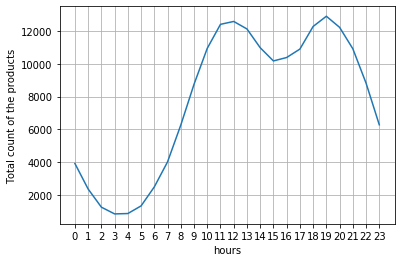

In [21]:
keys = [pair for pair, df1 in df.groupby(['Hour'])]

plt.plot(keys, df.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.xlabel('hours')
plt.ylabel('Total count of the products')
plt.show()
 
# I would recommend to advertise the product slightly before 11am or 7pm

# Q4. Which of the products were ordered the most?

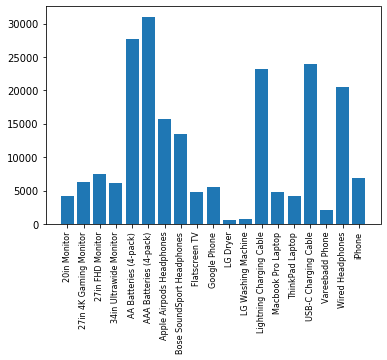

In [22]:
#plotting products vs quantity ordered

product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df1 in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()